<h1>Mobina Pournemat: 97105833</h1>

# Install & Import Libraries

<div dir="rtl">
ابتدا تمام پکیج های لازم را نصب می کنیم و سپس کتابخانه های موردنیاز را  import می کنیم.
</div>

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GEOquery")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GEOquery'”
Old packages: 'pbdZMQ', 'brew', 'generics', 'pillar', 'readr', 'rlang',
  'svglite', 'tidyr'



In [ ]:
install.packages("limma")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘limma’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages("Biobase")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Biobase’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
install.packages("pheatmap")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("stringr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("languageserver")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘rex’, ‘cyclocomp’, ‘R.cache’, ‘collections’, ‘lintr’, ‘styler’, ‘xmlparsedata’




In [ ]:
library(GEOquery)
library(Biobase)
library(pheatmap)
library(limma)
library(reshape2)
library(plyr)
library(ggplot2)
library(stringr)

# Loading Dataset

<div dir="rtl">
در این بخش با کمک کتابخانه GEOquery دیتاست موردنظر را دانلود می کنیم و می خوانیم.
توجه داریم که چون این دیتاست تنها یک پلتفرم دارد می توانیم مستقیما داده ها را از gset[1] دریافت کنیم.
</div>

In [ ]:
gset <- getGEO("GSE48558", GSEMatrix =TRUE, AnnotGPL=TRUE , destdir = "Data")
gset <- gset[[1]]

Found 1 file(s)

GSE48558_series_matrix.txt.gz

Using locally cached version: Data/GSE48558_series_matrix.txt.gz

Using locally cached version of GPL6244 found here:
Data/GPL6244.annot.gz 



In [ ]:
ex = exprs(gset)
ex[1:5,1:5] # matrise bayan - har satr ye zhene , har soton ye sample

,GSM1180750,GSM1180751,GSM1180752,GSM1180753,GSM1180754
7892501,5.635547,4.916813,5.478152,5.596580,5.768478
7892502,6.640414,5.838517,7.101921,5.190309,5.926461
7892503,5.108161,5.953453,6.383739,3.696127,5.701286
7892504,8.414047,9.026401,9.456269,8.746534,7.717569
7892505,2.280691,2.423883,3.141614,2.105208,3.035931


<div dir="rtl"> 

</div>

<div dir="rtl"> 
همانطور که در صورت پروژه گفته شده، به نمونه هایی نیاز داریم که phenotype آن ها Normal و یا source_name شان AML Patient باشد.
</div>

In [ ]:
gset<- gset[,which(gset$source_name_ch1 == "AML Patient" | gset$`phenotype:ch1` == "Normal")]

<div dir="rtl"> 
در ادامه برای نمونه های انتخاب شده در بخش قبل، label یا همان نام گروه قرار می دهیم. برای نمونه هایی که source_name شان AML Patient است، نام Test و برای نمونه هایی که phenotype شان Normal است، نام Normal قرار می دهیم.
</div>
<div dir="rtl"> 
با توجه به اینکه در بخش "بررسی تمایز در بیان ژن ها" گفته شده که دسته ای از نمونه های Normal که correlation بیشتری با داده تست دارند را به دست آوریم، در نام نمونه های Normal بخش source_name را هم اضافه می کنیم تا در ادامه بتوانیم بخش های بعدی را نیز پاسخ دهیم.
</div>

In [ ]:
f <- function(x) {
  if (gset$source_name_ch1[x] == "AML Patient") {return("Test")} 
  else {
    name <- strsplit2(gset$source_name_ch1[x], "\\+")[1, 1]
    return(paste0("Normal_", name))
  }
}
gr <- sapply(1:length(gset$`phenotype:ch1`), f)

# Data Analysis

<div dir="rtl"> 
در ادامه با استفاده از تابع exprs ماتریس بیان ژن ها را می گیریم و بخشی از جدول نشان داده شده است. در این جدول هر سطر مختص یک ژن و هر ستون مختص یک نمونه است. یعنی محتویات این جدول نشان دهنده میزان بیان هر ژن در نمونه های مختلف است.
</div>

In [ ]:
ex <- exprs(gset)
ex[1:5,1:5]

,GSM1180750,GSM1180751,GSM1180752,GSM1180753,GSM1180754
7892501,5.635547,4.916813,5.478152,5.596580,5.768478
7892502,6.640414,5.838517,7.101921,5.190309,5.926461
7892503,5.108161,5.953453,6.383739,3.696127,5.701286
7892504,8.414047,9.026401,9.456269,8.746534,7.717569
7892505,2.280691,2.423883,3.141614,2.105208,3.035931


<div dir="rtl"> 
هم چنین می توانیم بیشترین و کمترین میزان بیان ژن ها در نمونه های مختلف را ببینیم:
</div>

In [ ]:
print(paste0("Maximum Expression: " , max(ex)))
print(paste0("Minimum Expression: " , min(ex)))

[1] "Maximum Expression: 13.76153622"
[1] "Minimum Expression: 1.611473179"


<div dir="rtl"> 
با توجه به اعداد Minimum و Maximum میزان بیان ژن ها، نتیجه می گیریم که در مقیاس Logarithm هستند. اگر این چنین نبود، با استفاده از کد زیر آن ها را به مقیاس Logarithm ای می بردیم:
</div>

In [ ]:
# ex <- log2(1+ex)
# ex(gset)<- ex

<div dir="rtl"> 
در ادامه به رسم و تحلیل تعدادی نمودار می پردازیم:
</div>

## Boxplot

<div dir="rtl"> 
با توجه به نمودار Boxplot  زیر می توان مشاهده کرد که میانه، چارک اول و چارک سوم در نمونه های مختلف بسیار به هم نزدیک هستند؛ در نتیجه نیازی به Normalize کردن داده ها نداریم.
</div>

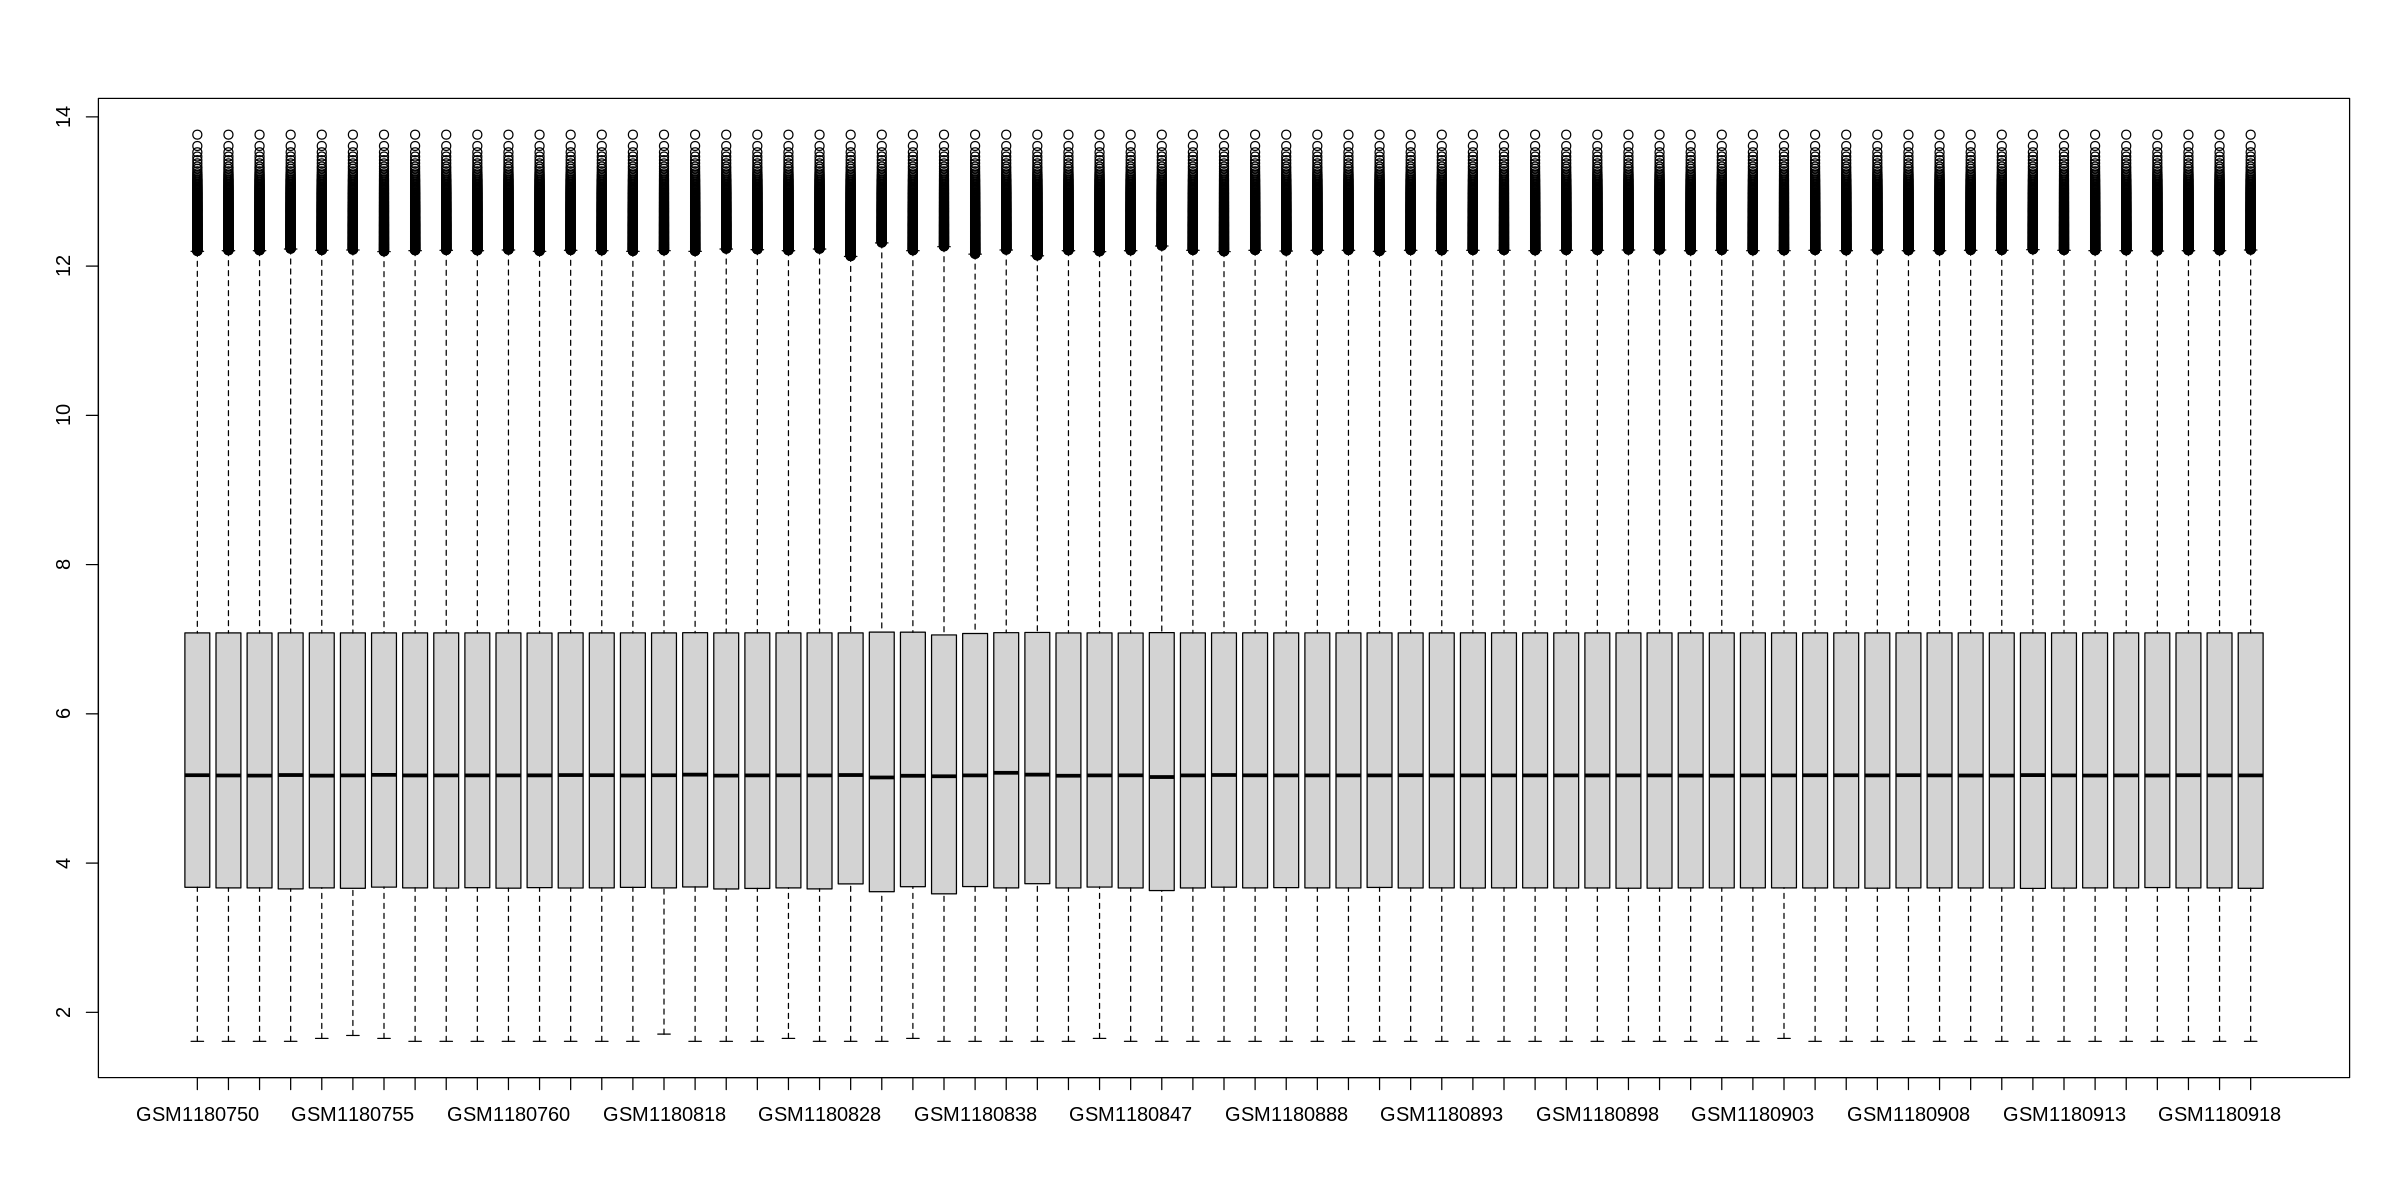

In [ ]:
options(repr.plot.height = 10, repr.plot.width=20)
# pdf("Result/boxplot.pdf", width = 30)
boxplot(ex)
# dev.off()

## PCA (Dimension Reduction)

<div dir="rtl"> 
با توجه به این موضوع که میزان بیان برخی ژن ها در دو گروه تا حد زیادی بهم نزدیک است و نمایش نمونه ها در فضای با ابعاد بالا (به تعداد ژن ها) عملا غیر ممکن است و قابلیت استنتاج و نتیجه گیری ندارد، از روش های کاهش ابعاد استفاده می کنیم تا تاثیر ژن هایی که عملا تفاوتی در نتایج ایجاد نمی کنند (ژن های با میزان بیان تقریبا مساوی در دو گروه) را کم کنیم تا بتوانیم ژن های تاثیرگذار را شناسایی کنیم. 
</div>

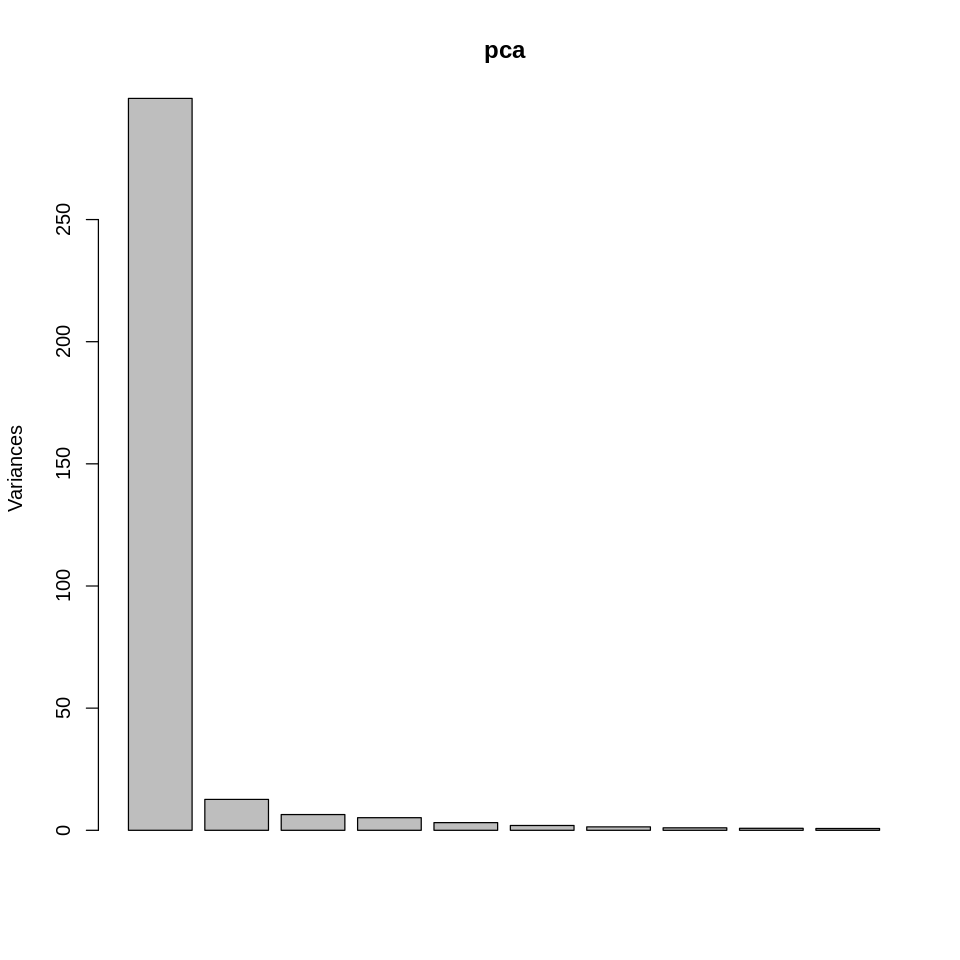

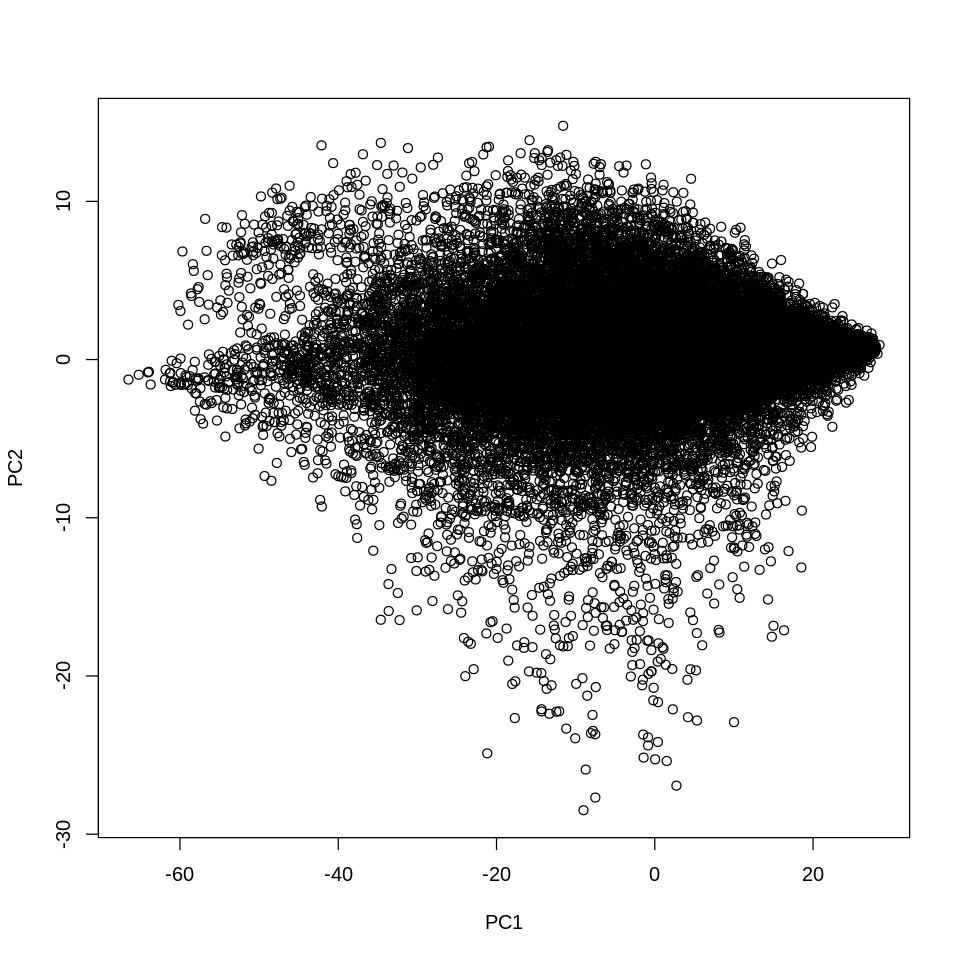

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)
pca <- prcomp(ex)
# pdf("Result/pca1.pdf" , width = 10, height = 10)
plot(pca)
plot(pca$x[, 1:2])
# dev.off()

<div dir="rtl"> 
با توجه به نمودار های بالا می توان نتیجه گرفت که این نوع کاهش ابعاد خیلی informative نیست و ما را به هدفمان از کاهش بعد نزدیک نمی کند.
چراکه با مشاهده نمودار میله ای متوجه می شویم که تقریبا تمام تغییرات بیان شده ناشی از یکی از مولفه های PCA است و به این ترتیب اطلاعاتی به دست نمی دهد.
در نمودار Scatter plot نیز که بر اساس دو مولفه مهم تر PCA رسم شده است، مشاهده می شود که تغییرات بیشتر در مسیر افقی هستند و بدین ترتیب این نمودار نیز حاوی اطلاعات مفید نیست!
در تحلیلی دیگر از نمودار های بالا می توان به این نکته نیز اشاره کرد که برخی ژن ها بیان خیلی زیاد (مثل ژن هایی که در همه سلول ها بیان بالایی دارند و برای فعالیت های حیاتی سلول لازمند) و برخی دیگر عملا بیان نشده اند (مانند ژن هایی که در همه نوع سلول ها بیان کمی دارند).
</div>

<div dir="rtl"> 
با توجه به توضیحات بالا، برای اینکه PCA مان بهتر عمل کند و اطلاعات مفیدی به دست دهد می توانیم از Standardization استفاده کنیم؛ به این ترتیب که به گونه ای بیان ژن ها را scale کنیم که میانگین بیان هر ژن در تمامی نمونه ها صفر شود.
</div>

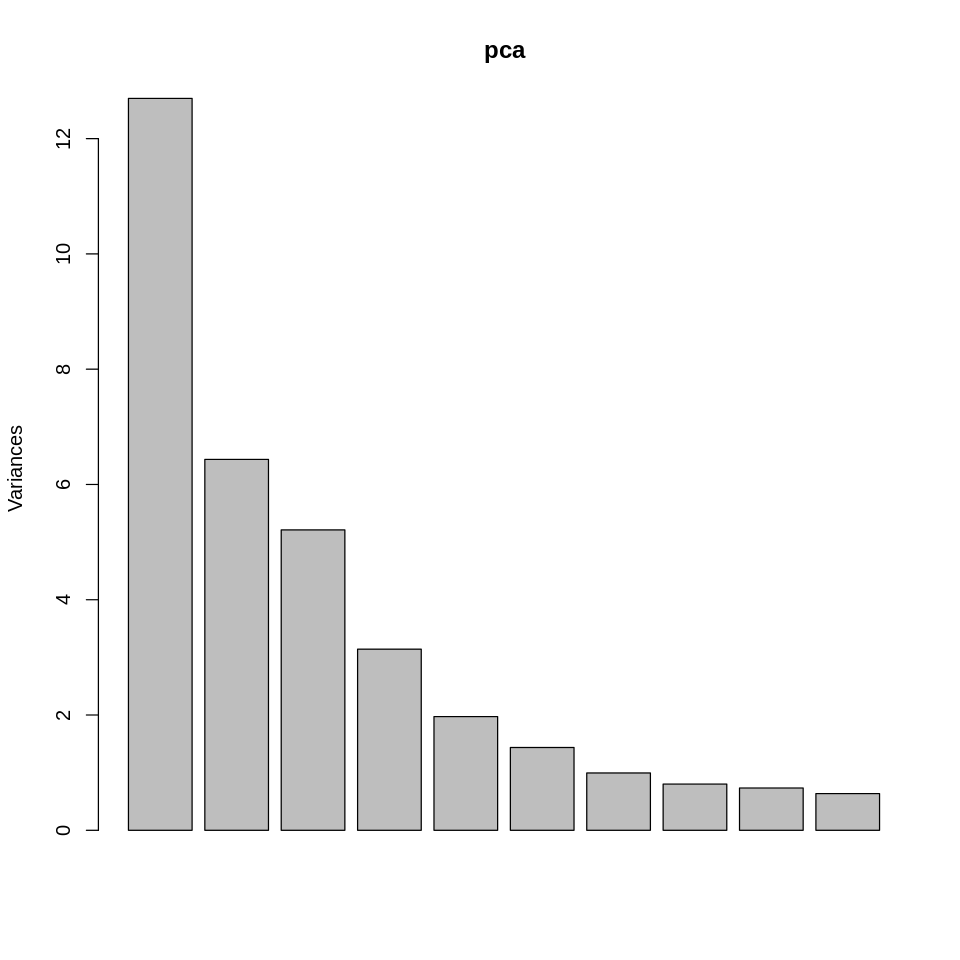

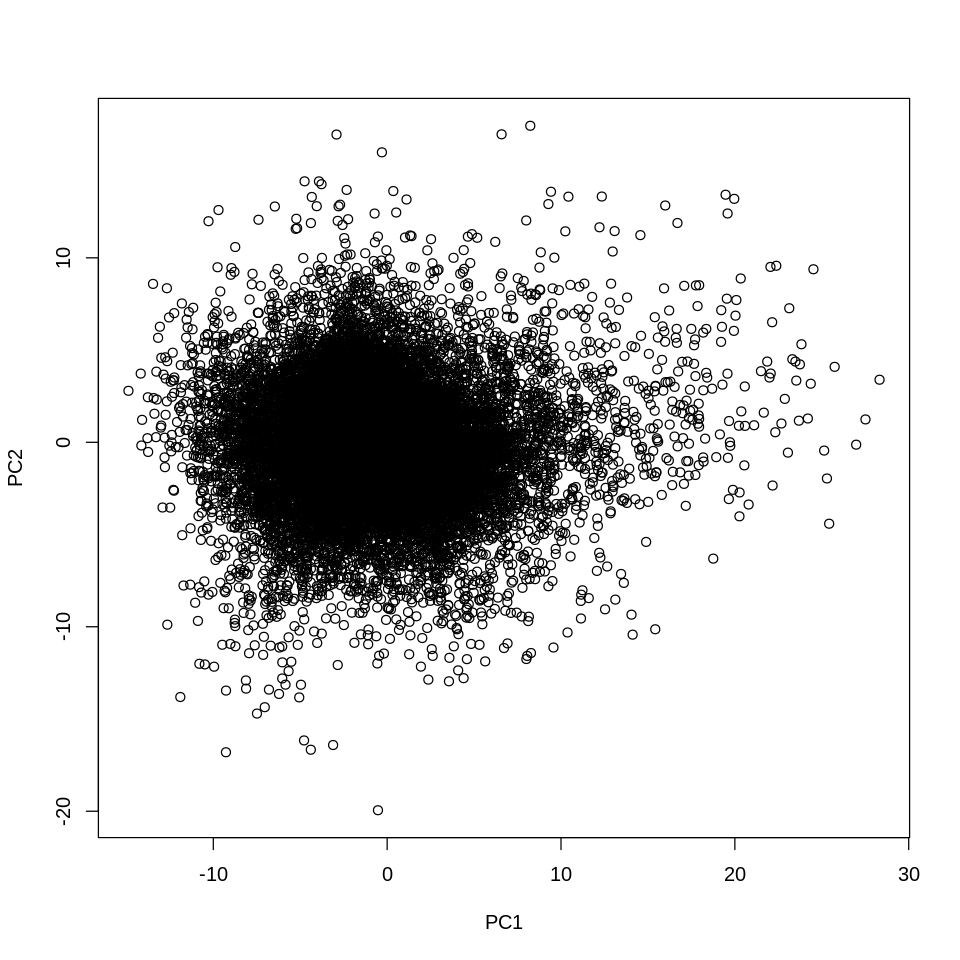

In [ ]:
scaled_ex <- t(scale(t(ex), scale = FALSE))
options(repr.plot.width = 8 ,repr.plot.height = 8 )
pca <- prcomp(scaled_ex)
# pdf("Result/pca2.pdf" , width = 10, height = 10)
plot(pca)
plot(pca$x[,1:2])
# dev.off()

<div dir="rtl"> 
با توجه به نمودار های بالا مشخص است که این بار نتایج حاصل از کاهش ابعاد بسیار informative تر شده و مولفه های PCA از هم متمایز شده اند. حالا می توانیم دو مولفه اصلی را در دو بعد نشان دهیم و جداپذیری معنادار نمونه ها را مشاهده کنیم.
</div>

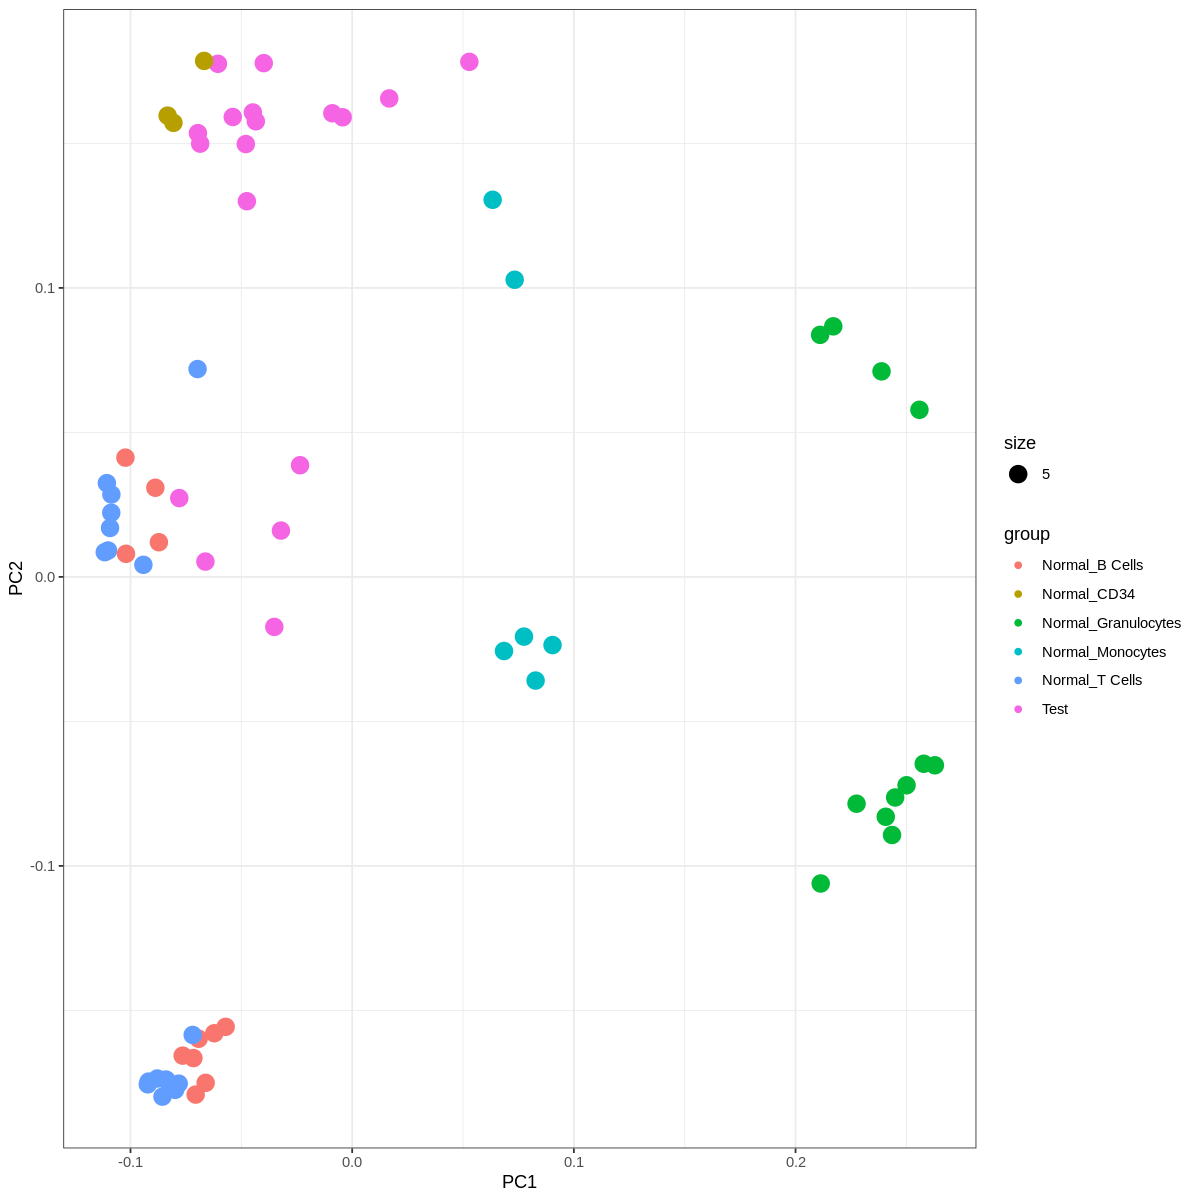

In [ ]:
pca_ <- data.frame(pca$rotation[,1:3] , group = gr)
# pdf("Result/pca_2d.pdf", width = 15, height = 15)
options(repr.plot.width = 10 ,repr.plot.height = 10)
ggplot(pca_, aes(PC1, PC2, color=group, size=5)) + geom_point()+ theme_bw()
# dev.off()

## Heatmap

<div dir="rtl"> 
برای مشاهده و بررسی میزان همبستگی بین نمونه های مختلف می توانیم از Correlation آن ها استفاده کنیم.
تابع Cor یک ماتریس بر می گرداند که در این ماتریس قطر اصلی همواره 1 است (چون همبستگی هر نمونه با خودش 1 می باشد) و بقیه مقادیر ماتریس، با توجه به میزان همبستگی نمونه ها به یکدیگر متغیر است.
</div>

In [ ]:
corex = cor(ex)
corex[1:5,1:5]

,GSM1180750,GSM1180751,GSM1180752,GSM1180753,GSM1180754
GSM1180750,1.0000000,0.9649510,0.9489548,0.9513937,0.9501057
GSM1180751,0.9649510,1.0000000,0.9421655,0.9528462,0.9412323
GSM1180752,0.9489548,0.9421655,1.0000000,0.9279631,0.9531062
GSM1180753,0.9513937,0.9528462,0.9279631,1.0000000,0.9078668
GSM1180754,0.9501057,0.9412323,0.9531062,0.9078668,1.0000000


<div dir="rtl"> 
برای بررسی بهتر همبستگی ها و تاثیر source_name بر همبستگی ها می توانیم نمودار Heatmap را رسم کنیم. 
</div>

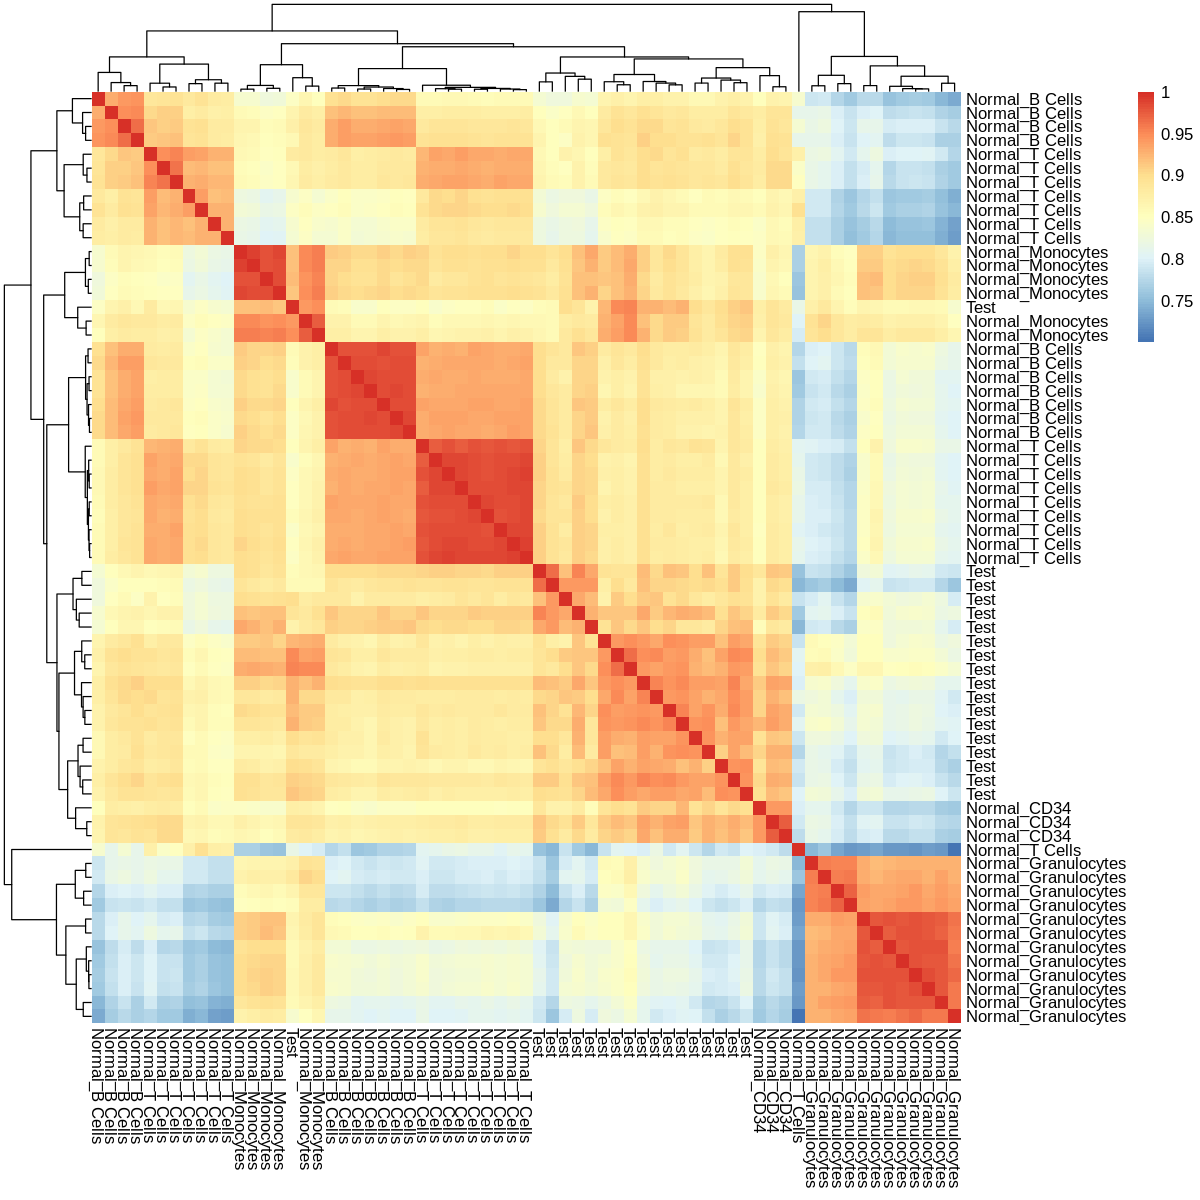

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 10)
pheatmap(corex, labels_row=gr, labels_col= gr, border_color = NA)

<div dir="rtl"> 
همانطور که مشاهده می کنید مقادیر روی قطر بیشترین میزان همبستگی را دارند (چون همبستگی هر نمونه با خودش را نشان می دهد) و در بقیه موارد متغیر است. علاوه براین مشاهده می شود که نمونه های Normal-T با یکدیگر و نمونه های Normal-B با یکدیگر همبستگی زیادی دارند.
نکته دیگری که از نمودار بالا و نمودار های قبلی به دست می آید این است که نمونه های Test بیشترین شباهت را به نمونه های Normal_CD34 دارند. داده هایی از نمونه های Test که شباهت زیادی به دسته ی Normal_CD34 دارند را جدا می کنیم و برای آن ها نام جدیدی انتخاب می کنیم.
</div>

In [ ]:
grr <- gr
grr[which(pcar$PC2 > 0.125 & pcar$group == "Test")] <- "Close_to_CD34"
grr <- factor(grr)
gset$description <- grr

<div dir="rtl"> 
حالا برای اینکه مشخص کنیم هر نمونه متعلق به کدام دسته است یک ماتریس میسازیم. با توجه به اینکه در مرحله بعد می خواهیم از کتابخانه limma و تابع ImFit استفاده کنیم، باید ماتریسمان فرمت one hot داشته باشد.
</div>

In [ ]:
design <- model.matrix(~ description + 0, gset)
colnames(design) <- levels(grr) # esm sotonaro taqir mide 
colnames(design) <- c(sapply(colnames(design), function(x) str_replace(x, " ", "")))
design[1:5,1:5]

,Close_to_CD34,Normal_BCells,Normal_CD34,Normal_Granulocytes,Normal_Monocytes
GSM1180750,1,0,0,0,0
GSM1180751,1,0,0,0,0
GSM1180752,1,0,0,0,0
GSM1180753,1,0,0,0,0
GSM1180754,1,0,0,0,0


<div dir="rtl"> 
حالا می توانیم از یک مدل خطی از کتابخانه limma استفاده کنیم و تفاوت میزان بیان ژن ها در دسته Test و دسته Normal_CD34 را به دست می آوریم.
سپس مشخص می کنیم که تفاوت بین کدام دو دسته را می خواهیم محاسبه کنیم و سپس برای اینکه یک توزیع Prior نیز در نظر گرفته باشیم، از یک مدل بیزین استفاده می کنیم و انتظارمان در توزیع پیشین این است که 1% از کل ژن ها تغییر بیان معناداری خواهد داشت.
</div>

In [ ]:
fit <- lmFit(gset, design) # ye seri khat fit mikone
cont <- makeContrasts(Close_to_CD34 - Normal_CD34, levels = design)
fitt <- contrasts.fit(fit , cont)
fitt <- eBayes(fitt, 0.01)

<div dir="rtl"> 
در ادامه نیز می توانیم top table را رسم کنیم که حاوی اطلاعات مفیدی از قبیل p-value ، Adjusted p-value ، LogFC و ... می باشد.
</div>

In [ ]:
toptab <- topTable(fitt, adjust="fdr", sort.by="B", number=Inf)

<div dir="rtl"> 
با توجه به اینکه فقط برخی ستون ها را لازم داریم، یک زیر مجموعه ای از top table را ذخیره می کنیم. در جدول پایین مثلا اگر  در خانه ای logFC = 4 باشد یعنی آن ژن در بیماران سرطانی 16 برابر افزایش بیان داشته است.
</div>

In [ ]:
toptabb <- subset(toptab, select = c("Gene.symbol", "Gene.title", "adj.P.Val", "logFC"))
toptabb[1:5,]

,Gene.symbol,Gene.title,adj.P.Val,logFC
,<chr>,<chr>,<dbl>,<dbl>
8160088,MPDZ,multiple PDZ domain crumbs cell polarity complex component,4.288564e-35,-3.641974
8101284,PRKG2,"protein kinase, cGMP-dependent, type II",4.681711e-29,-5.773467
7910915,CHRM3,cholinergic receptor muscarinic 3,4.428883e-27,-4.356081
8008588,HLF,"HLF, PAR bZIP transcription factor",1.440983e-23,-4.379706
8160168,FREM1,FRAS1 related extracellular matrix 1,7.653406e-23,-3.414933


In [ ]:
# write.table(toptabb ,"Result/top_table.txt", sep = "\t" , row.names = FALSE, quote = FALSE)

<div dir="rtl"> 
حالا می خواهیم ژن هایی را که در بیماران افزایش بیان داشته اند، جدا کنیم. برای این منظور ژن هایی را می خواهیم که logFC بزرگتر از 1 و p-value کمتر از 0.05 داشته باشند.
</div>

In [ ]:
increase <- subset(toptabb, adj.P.Val < 0.05 & logFC > 1)
increase_genes <- unique(as.character(strsplit2((increase$Gene.symbol),"///")))

In [ ]:
increase_genes

In [ ]:
# write.table(increase_genes, "Result/increased_genes.txt", quote = FALSE, row.names = FALSE, col.names = FALSE)

<div dir="rtl"> 
و سپس ژن هایی را به دست می آوریم که در بیماران کاهش بیان داشته اند. برای این منظور ژن هایی از top table را می خواهیم که logFC کمتر از -1 و p-value کمتر از 0.05 داشته باشند.
</div>

In [ ]:
decrease <- subset(toptabb, adj.P.Val < 0.05 & logFC < -1)
decrease_genes <- unique(as.character(strsplit2( (decrease$Gene.symbol),"///")))

In [ ]:
decrease_genes

[1] "MPDZ"                   "PRKG2"                  "CHRM3"                 
  [4] "HLF"                    "FREM1"                  "NKAIN2"                
  [7] "NAP1L3"                 "PLCB4"                  "PBX1"                  
 [10] "SGIP1"                  ""                       "CRHBP"                 
 [13] "SGCZ"                   "EMCN"                   "FAT4"                  
 [16] "ST6GAL2"                "LIMCH1"                 "RPS6KA6"               
 [19] "DTX3"                   "HFM1"                   "PRKG1"                 
 [22] "HTR1F"                  "RNF150"                 "ELN"                   
 [25] "ADGRG6"                 "BEX2"                   "CDH7"                  
 [28] "PLOD2"                  "CEP126"                 "SPOCK3"                
 [31] "CNN3"                   "NUDT11"                 "LRCH2"                 
 [34] "VWDE"                   "PDZD2"                  "ELAC2"                 
 [37] "SLC22A17"               "CCDC175"                "SYTL4"                 
 [40] "ABI3BP"                 "FAM19A2"                "CTSF"                  
 [43] "FHL1"                   "SDR42E1"                "STAC"                  
 [46] "GPR21"                  "MYCT1"                  "PRO2012"               
 [49] "NAP1L2"                 "RAB38"                  "ARMC4"                 
 [52] "PLS3"                   "TCTEX1D1"               "STARD9"                
 [55] "IL12RB2"                "KLF3-AS1"               "TMEM136"               
 [58] "JAM2"                   "CXorf57"                "PDZRN4"                
 [61] "PGM5P2"                 "ARMCX1"                 "SLC25A27"              
 [64] "MCF2L2"                 "TRO"                    "PLA2R1"                
 [67] "RNF17"                  "ATP9A"                  "CP"                    
 [70] "BEND7"                  "BEX5"                   "L3MBTL4"               
 [73] "CHRNA5"                 "TSPAN6"                 "TMEM163"               
 [76] "MTURN"                  "LTBP3"                  "ARHGAP22"              
 [79] "ARG2"                   "TVP23A"                 "ARHGEF17"              
 [82] "PRSS3P2"                "TAPT1-AS1"              "CYYR1"                 
 [85] "TSPYL5"                 "SCD"                    "ENO2"                  
 [88] "FBN1"                   "SEPT5-GP1BB"            "GPC5"                  
 [91] "CA13"                   "TMEM220"                "LOC400464"             
 [94] "MYO5C"                  "SMO"                    "LDOC1"                 
 [97] "REC8"                   "METTL24"                "CACNB2"                
[100] "TSPAN2"                 "TRIM74"                 "TCEAL9"                
[103] "SNHG16"                 "MIPOL1"                 "CALN1"                 
[106] "TXNRD3NB"               "SYDE2"                  "FAM169A"               
[109] "LRRN1"                  "PCDH9"                  "MDGA2"                 
[112] "FIGN"                   "PACRG"                  "UCHL1"                 
[115] "NSUN7"                  "FGD5"                   "VWA2"                  
[118] "ZBED8"                  "ZNRF1"                  "SERPINE2"              
[121] "PCYT1B"                 "ZNF300"                 "PGM5"                  
[124] "SPINK2"                 "DKFZP434L187"           "GATS"                  
[127] "DPPA4"                  "MIR24-2"                "CAMLG"                 
[130] "C1orf21"                "THRB"                   "SYS1-DBNDD2"           
[133] "STK33"                  "GCNT2"                  "MME"                   
[136] "SEMA3C"                 "PREX2"                  "SETBP1"                
[139] "SLC16A2"                "ID1"                    "SLC8A3"                
[142] "LOC100134868"           "AASS"                   "SLC29A2"               
[145] "TMEM98"                 "MPPED2"                 "RAPGEF3"               
[148] "C10orf10"               "F

In [ ]:
# write.table(decrease_genes, "Result/decreased_genes.txt", quote = FALSE, row.names = FALSE, col.names = FALSE)